# Misc Plots

This script is used to create a few figures for the presentation.

In [26]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

from Random import *
from Graph import *

In [33]:
random = Random(
    "../../_random_presets/random_preset_1.b",
    "../../_graph_presets/sparse_100.b",
    ""
)

graph, pos = random.graph, random.pos
graph.number_of_nodes(), graph.number_of_edges()

(100, 200)

In [28]:
G = Graph(None, random)
G.create_random()

G.decompose(method = "matcha")
G.compute_probabilities(method = "random", comm_budget=0.25)
random_probabilities = G.probabilities
G.compute_probabilities(method = "matcha", comm_budget=0.25) 
matcha_probabilities = G.probabilities

In [29]:
print([len(s) for s in G.subgraphs])
print(random_probabilities)
print(matcha_probabilities)

[5, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2]
(0.06740012988242855, 0.0743719526849125, 0.26348586475742697, 0.3212579249926484, 0.08994143939641262, 0.1787841138248627, 0.5157058655733707, 0.398075323077697, 0.008681931303464984, 0.4078534641867108, 0.08559878059629691, 0.5118873459540758, 0.450671892275469, 0.23310644856570106, 0.14317752292852207)
(0.2500053589578259, 0.2499932108908586, 0.2500110495350692, 0.24999387822068536, 0.24999508415133145, 0.25000103581830213, 0.25001267445998143, 0.2499909031459883, 0.2500071864491695, 0.24999766652078603, 0.25000238174027933, 0.24999928207847236, 0.2499964031147639, 0.249999671430707, 0.2499942134857798)


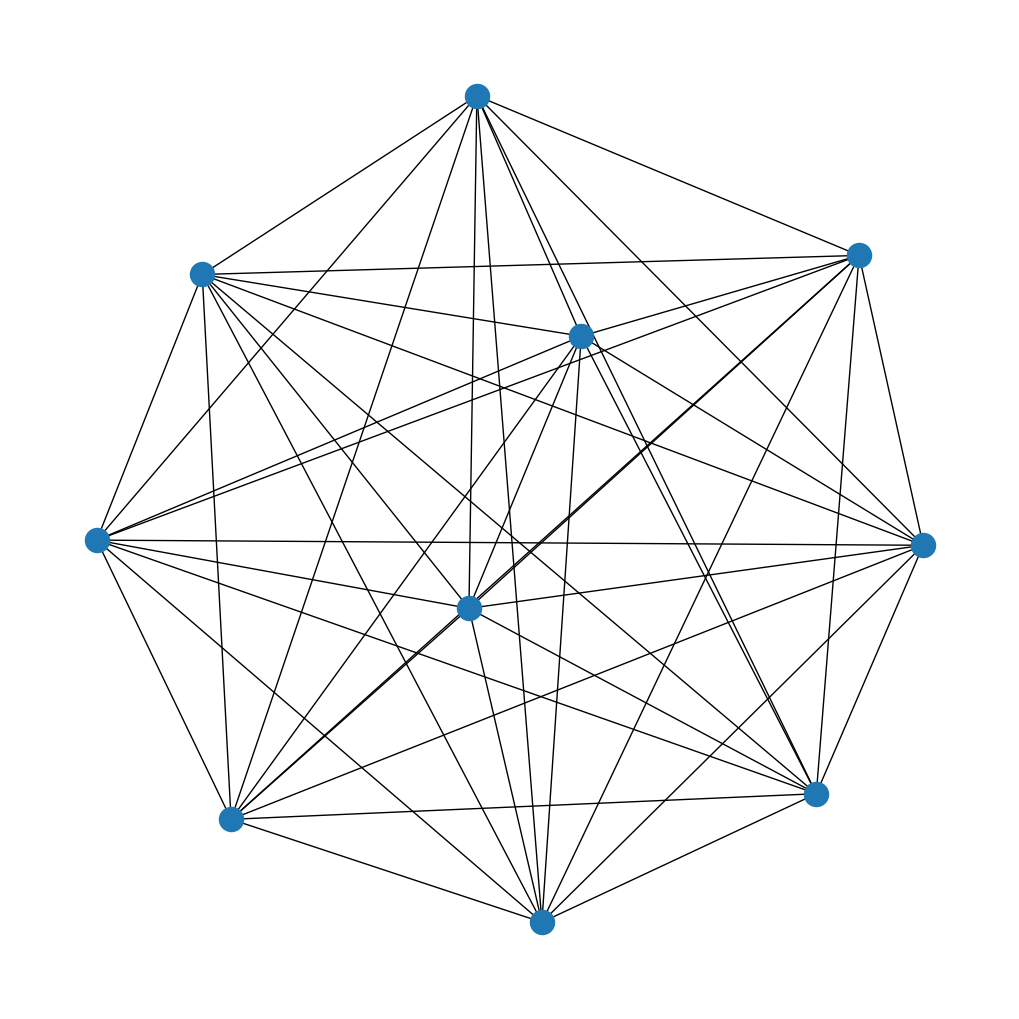

In [30]:
plt.figure(figsize=(10, 10))

both_labels = {
    e: "%.2f | %.2f" % (r, p)
    for (s, r, p) in zip(G.subgraphs, random_probabilities, matcha_probabilities)
    for e in s
}

matcha_labels = {
    e: "%.2f" %  p
    for (s, r, p) in zip(G.subgraphs, random_probabilities, matcha_probabilities)
    for e in s
}

nx.draw(G.G, pos, with_labels = False)

'''
nx.draw_networkx_edge_labels(
    G.G, pos,
    edge_labels = both_labels,
    font_color='red',
    font_size=12
)
'''

plt.show()